<a href="https://colab.research.google.com/github/lucilafalcone/CoderHouse/blob/main/Falcone_Nuevo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCCION
Las autoridades de una localidad de la provincia buscan saber si existe un incremento en los casos de paro cardiaco que se producen en los ciudadanos de esa localidad.

Para ello nos brindaron un DataSet en el cual encontramos los siguentes datos que resultan ser los mas relevantes:

*  Edad,
*  Genero,
*  Enfermedades preexitentes como hipertension o enfermedades cardiovasculares,
*  si son fumadores o no,
*  Tipo de residente, si son de la ciudad o rurales.


De acuerdo a estos datos podemos desarrollar un modelo de aprendizaje supervisado (problema de clasificacion),ya que conocemos si de acuerdo a las variables mencionadas la persona sufrió un ataque cardiaco o no y el resultado será si o no.

# INTERROGANTES


1. ¿Sobre que intervalo de edad se va a trabajar?  
2. De acuerdo a los datos,¿Son más las personas que sufrieron un ataque cardíaco?
3. ¿Cuál es la edad en la que se produce la mayor cantidad de paro cardíaco?

# OBJETIVO
El interrogante a resolver es si hay una tendencia de acuerdo al genero y la edad y las enfermedades prexistentes de una persona de que sufra un ataque cardiaco.

In [ ]:
#importamos las librerias a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#importamos el dataSet a utlizar
url = 'https://raw.githubusercontent.com/lucilafalcone/CoderHouse/main/salud.csv'

In [ ]:
salud= pd.read_csv(url)

In [ ]:
#visualizamos el DataSet
salud

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#Eliminamos los valores nulos
salud.dropna()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
salud.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.83,21161.72,67.00,17741.25,36932.00,54682.00,72940.00
age,5110.0,43.23,22.61,0.08,25.00,45.00,61.00,82.00
hypertension,5110.0,0.10,0.30,0.00,0.00,0.00,0.00,1.00
heart_disease,5110.0,0.05,0.23,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,5110.0,106.15,45.28,55.12,77.24,91.88,114.09,271.74
bmi,4909.0,28.89,7.85,10.30,23.50,28.10,33.10,97.60
stroke,5110.0,0.05,0.22,0.00,0.00,0.00,0.00,1.00


#EDA (Analisis Exploratorio de Datos)

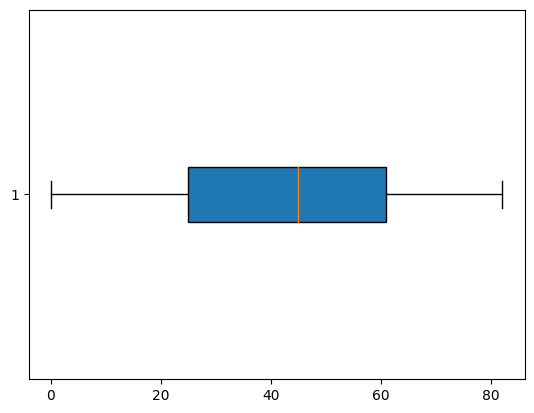

In [ ]:
#Con Boxplot determinaremos si existen outliers en la variable edad#
plt.boxplot(salud ["age"], vert=False, patch_artist=True)
plt.show()

Es decir, que la mayoria de los datos esta entre los 20 y 60 años.
Y que el valor minimo son 0 años y el maximo son 80 años, en este DataSet.

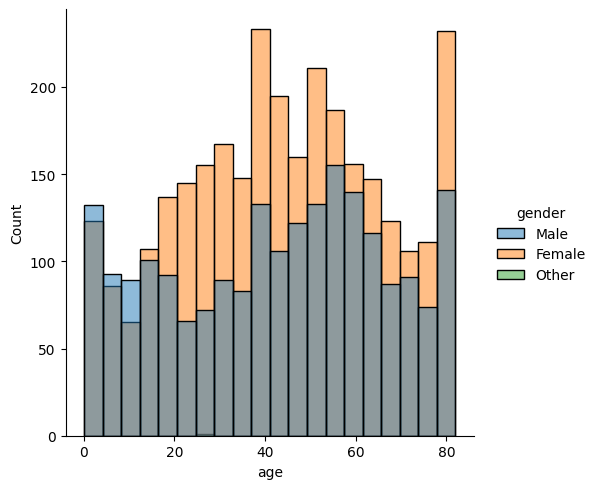

In [ ]:
#Con esta visualizacion veremos como se compone nuestro DataSet teniendo el genero y la edad#
sns.displot(data=salud, x="age", hue="gender")

Con estos resultados podemos suponer que tenemos más informacion sobre las mujeres que sobre los hombres

In [ ]:
#importamos la librearia Seaborn
import seaborn as sns

<Axes: xlabel='age', ylabel='Count'>

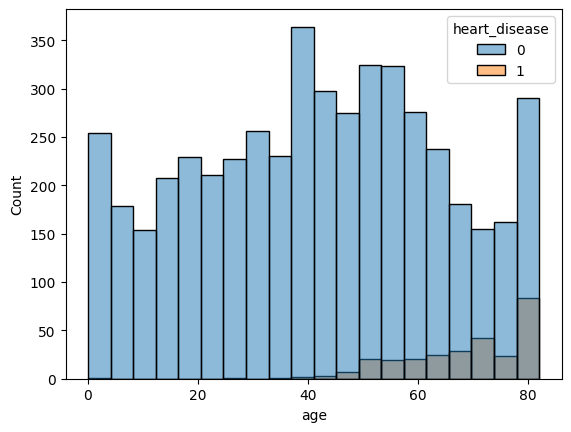

In [ ]:
#Con la siguiente visualizacion podemos ver que impacto tienen los paros cardiacos de acuerdo a la edad de las personas que componen nuestro DataSet#
sns.histplot(data=salud, x='age', hue= 'heart_disease')

Vemos con esta visualización que dentro de la informacion recabada son menos las personas que sufrieron un paro cardiaco que las que no lo sufrieron.

<Axes: xlabel='heart_disease', ylabel='age'>

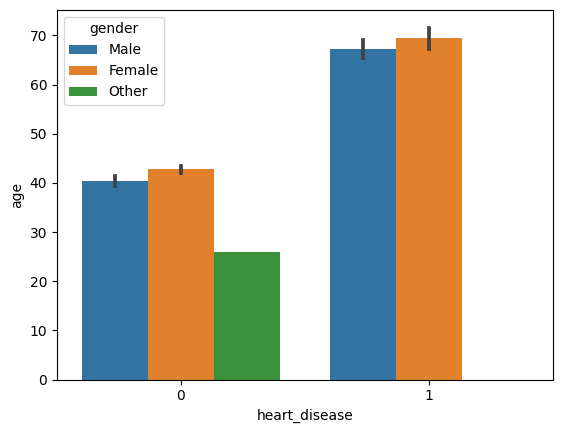

In [ ]:
sns.barplot(data=salud, x='heart_disease', y='age', hue='gender')

Con este grafico podemos observar que las personas que sufrieron ataques cardiacos son las de edad mas elevada

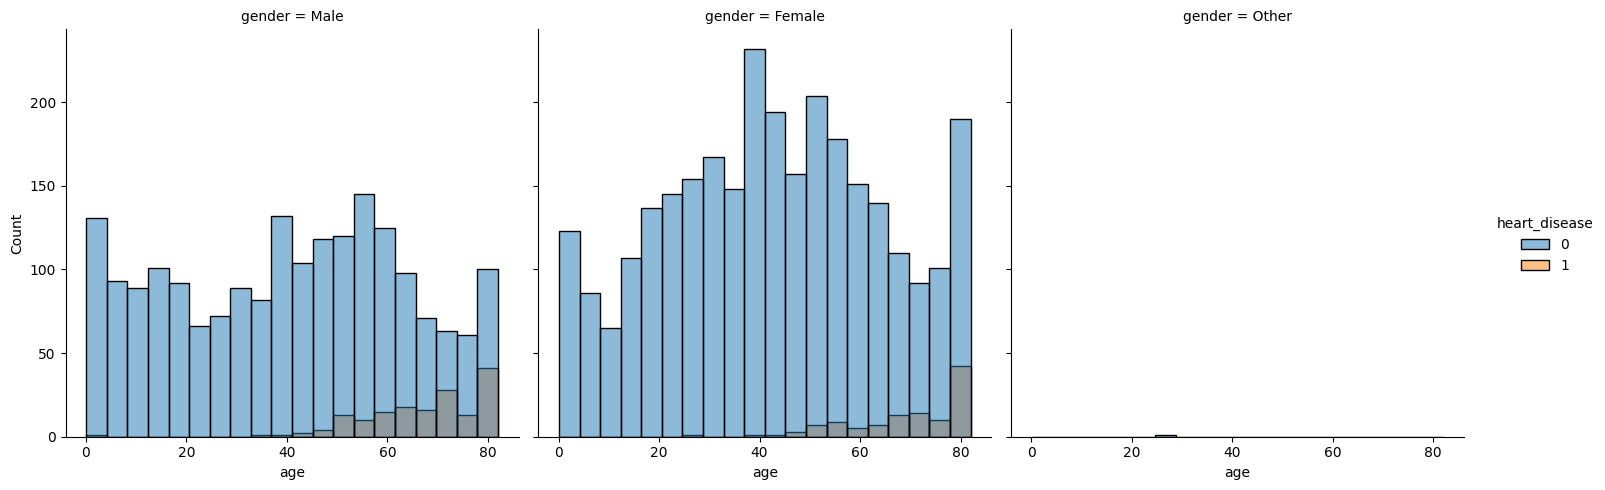

In [ ]:
sns.displot(data=salud, x='age', hue='heart_disease', col='gender')

Con este grafico visualizamos por separado por genero y edad.
Tanto en hombres como en mujeres puede verse que la mayor cantidad de infartos se da en personas de 80 años de edad.

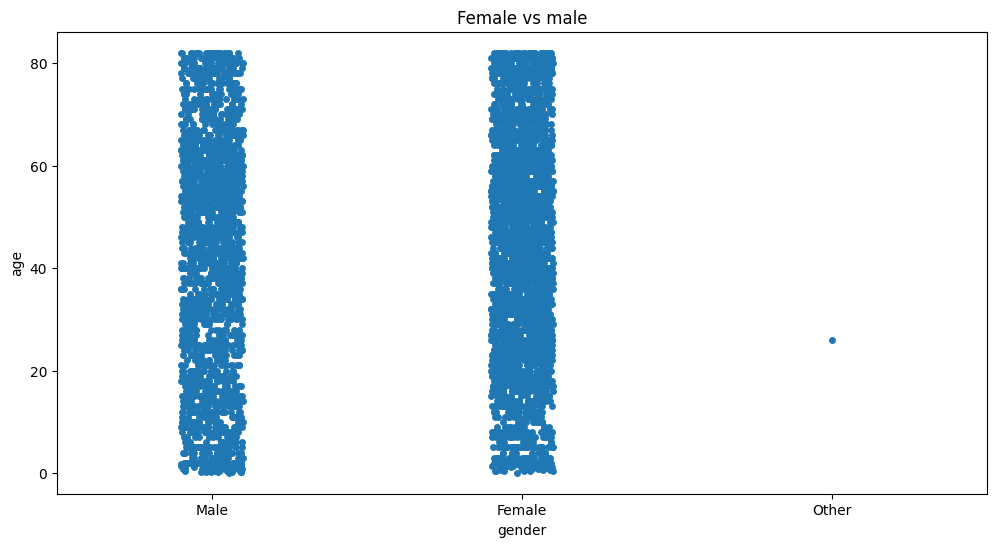

In [ ]:
plt.subplots(figsize=(12,6))
plt.title('Female vs male')

ax = sns.stripplot(x="gender", y="age", data=salud)
plt.ylabel('age')
plt.show()

Este grafico nos permite verla densidad de los datos, es decir como se distribuyen los datos de acuerdo a la variable edad y genero

# Dividimos los datos para entrenar el modelo

In [ ]:
train_cols = ['age', 'hypertension',  'heart_disease', 'avg_glucose_level']
X = salud[train_cols]
Y = salud['stroke']

In [ ]:
salud2=salud.loc[:,['age','hypertension', 'heart_disease','avg_glucose_level', 'stroke']]
salud2.corr()

,age,hypertension,heart_disease,avg_glucose_level,stroke
age,1.000000,0.276398,0.263796,0.238171,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.131945
stroke,0.245257,0.127904,0.134914,0.131945,1.000000


Se seleccionaron solo estas variables porque queremos ver como se comporta la variable Stroke a traves de las variables edad, y las enfermedades preexistentes como hipertension, nivel de glucosa y si tiene cardiopatia. Con el cuadro superior se puede ver la correlatividad entre las variable seleccionadas.

In [ ]:
Y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
#split entre entrenamiento y test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

## Feature selection

In [ ]:
#para elegir modelo
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
m1=LogisticRegression(max_iter=1000)
m2=KNeighborsClassifier(4)
m3=DecisionTreeClassifier(random_state=0 )

En el caso de KNN se utilizó un hiperparametro bajo, para que el sesgo sea menor. Aunque con mas pruebas puede determinarse si el hiperparamtro elegido podria haber sido otro.
En el caso del arbol de desicion se definio como hiperparametro que tomara las variables fijas.

Se utilizará como metrica la valoracion cruzada ya que nos permitira conocer la exactitud de las prediccion de los modelos utilizados. Permitiendo comparar los modelos para seleccionar el mas adecuado.

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
cross_val_score (m1, X_train, Y_train, cv=3).mean()

0.9543320714915673

In [ ]:
cross_val_score (m2, X_train, Y_train, cv=3).mean()

0.9527663092741898

In [ ]:
cross_val_score (m3, X_train, Y_train, cv=3).mean()

0.9141445149915707

De acuerdo a los resultados obtenidos en el entrenamiento, elegimos el modelo de regresion, ya que es el que mejor performa de acuerdo a la metrica utilizada.

#Calculamos el accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
modelo1=LogisticRegression(max_iter=1000)

In [ ]:
modelo1.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
ypred=modelo1.predict(X_test)

In [ ]:
accuracy_score(ypred,Y_test)

0.9420970266040689

# CONCLUSION
El modelo seleccionado fue el de regresión lineal.
Sin embargo, puede ser que los datos se ajusten mejor a oun modelo diferente.
Ya que que el resultado sea tan bueno nos puede llevar a pensar que el modelo al ser sencillo haya overfiteado.

Se puede continuar investigando con modelos mas complejos la relacion entre variables antes de descartar la posibilidad de que realmente exista correlacion entre las variables que fueron seleccionadas.

# Eleccion de hiperparametros para random forest

In [ ]:
train_cols = ['age', 'hypertension',  'heart_disease', 'avg_glucose_level']
X = salud[train_cols]
Y = salud['stroke']

Importamos las librerias para elegir los hiperparametros mas optimos y para realizar el modelo con Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

Definimos los valores de los hiperparametros sobre los que vamos a buscar

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]}

Creamos el objeto con Gridsearch

In [ ]:
clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=scoring, cv=3, verbose=2)

Lo entrenamos con los datos del entrenamiento

In [ ]:
grid_search.fit(X_train, Y_train)

Lo re entrenamos con los hiperparametros mas optimos

In [ ]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, Y_train )

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=300)

#Modelo de ensamble

In [ ]:
#split entre entrenamiento y test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

Para el modelo 1 Usamos RandomForest

In [ ]:
m1=RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=300,random_state=0)

Lo entrenamos

In [ ]:
m1.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=300,
                       random_state=0)

Lo ponemos a prueba

In [ ]:
y_pred= m1.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)

Mostramos el accuracy calculado

In [ ]:
accuracy

0.94679186228482

Para el modelo 2 usamos Arbol de Decision

In [ ]:
m2=DecisionTreeClassifier(random_state=0 )

Lo entrenamos

In [ ]:
m2.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

Lo ponemos a prueba

In [ ]:
y_pred2= m2.predict(X_test)

In [ ]:
accuracy2= accuracy_score(Y_test, y_pred2)

Mostramos el accuracy obtenido

In [ ]:
accuracy2

0.9100156494522692

Y finalmente para el modelo 3 usamos Knn

In [ ]:
m3=KNeighborsClassifier(4)

Lo entrenamos

In [ ]:
m3.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred3= m3.predict(X_test)

In [ ]:
accuracy3= accuracy_score(Y_test, y_pred3)

Mostramos el accuracy obtenido

In [ ]:
accuracy3

0.9436619718309859